# ADA Data Explotarion

### Variables

SOURCE_SUBREDDIT: the subreddit where the link originates

TARGET_SUBREDDIT: the subreddit where the link ends

POST_ID: the post in the source subreddit that starts the link

TIMESTAMP: time time of the post

POST_LABEL: label indicating if the source post is explicitly negative towards the target post. 

The value is -1 if the source is negative towards the target, and 1 if it is neutral or positive. 

The label is created using crowd-sourcing and training a text based classifier, and is better than simple sentiment analysis of the posts. Please see the reference paper for details.

POST_PROPERTIES: a vector representing the text properties of the source post, listed as a list of comma separated numbers. The vector elements are the following:

01. Number of characters
2. Number of characters without counting white space
3. Fraction of alphabetical characters
4. Fraction of digits
5. Fraction of uppercase characters
6. Fraction of white spaces
7. Fraction of special characters, such as comma, exclamation mark, etc.
8. Number of words
9. Number of unique works
10. Number of long words (at least 6 characters)
11. Average word length
12. Number of unique stopwords
13. Fraction of stopwords
14. Number of sentences
15. Number of long sentences (at least 10 words)
16. Average number of characters per sentence
17. Average number of words per sentence
18. Automated readability index
19. Positive sentiment calculated by VADER
20. Negative sentiment calculated by VADER
21. Compound sentiment calculated by VADER
22. LIWC_Funct
23. LIWC_Pronoun
24. LIWC_Ppron
25. LIWC_I
26. LIWC_We
27. LIWC_You
28. LIWC_SheHe
29. LIWC_They
30. LIWC_Ipron
31. LIWC_Article
32. LIWC_Verbs
33. LIWC_AuxVb
34. LIWC_Past
35. LIWC_Present
36. LIWC_Future
37. LIWC_Adverbs
38. LIWC_Prep
39. LIWC_Conj
40. LIWC_Negate
41. LIWC_Quant
42. LIWC_Numbers
43. LIWC_Swear
44. LIWC_Social
45. LIWC_Family
46. LIWC_Friends
47. LIWC_Humans
48. LIWC_Affect
49. LIWC_Posemo
50. LIWC_Negemo
51. LIWC_Anx
52. LIWC_Anger
53. LIWC_Sad
54. LIWC_CogMech
55. LIWC_Insight
56. LIWC_Cause
57. LIWC_Discrep
58. LIWC_Tentat
59. LIWC_Certain
60. LIWC_Inhib
61. LIWC_Incl
62. LIWC_Excl
63. LIWC_Percept
64. LIWC_See
65. LIWC_Hear
66. LIWC_Feel
67. LIWC_Bio
68. LIWC_Body
69. LIWC_Health
70. LIWC_Sexual
71. LIWC_Ingest
72. LIWC_Relativ
73. LIWC_Motion
74. LIWC_Space
75. LIWC_Time
76. LIWC_Work
77. LIWC_Achiev
78. LIWC_Leisure
79. LIWC_Home
80. LIWC_Money
81. LIWC_Relig
82. LIWC_Death
83. LIWC_Assent
84. LIWC_Dissent
85. LIWC_Nonflu
86. LIWC_Filler

LIWC - linguistic inquiry and word count (codebook: https://www.liwc.app/static/documents/LIWC-22%20Manual%20-%20Development%20and%20Psychometrics.pdf)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", 100)

In [3]:
# Example: load hyperlinks from titles
df_title = pd.read_csv("data/soc-redditHyperlinks-title.tsv", sep="\t")
df_body = pd.read_csv("data/soc-redditHyperlinks-body.tsv", sep="\t")

In [71]:
display(df_title.head())
display(df_body.head())

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [72]:

# Example: assume you already have df_body loaded
# df_body = pd.read_csv("soc-redditHyperlinks-body.tsv", sep="\t")

# Step 1. Create the list of column names for POST_PROPERTIES
post_props_cols = [
    "num_chars", "num_chars_no_space", "frac_alpha", "frac_digits",
    "frac_upper", "frac_spaces", "frac_special", "num_words",
    "num_unique_words", "num_long_words", "avg_word_length",
    "num_unique_stopwords", "frac_stopwords", "num_sentences",
    "num_long_sentences", "avg_chars_per_sentence", "avg_words_per_sentence",
    "readability_index", "sent_pos", "sent_neg", "sent_compound",
    "LIWC_Funct", "LIWC_Pronoun", "LIWC_Ppron", "LIWC_I", "LIWC_We",
    "LIWC_You", "LIWC_SheHe", "LIWC_They", "LIWC_Ipron", "LIWC_Article",
    "LIWC_Verbs", "LIWC_AuxVb", "LIWC_Past", "LIWC_Present", "LIWC_Future",
    "LIWC_Adverbs", "LIWC_Prep", "LIWC_Conj", "LIWC_Negate", "LIWC_Quant",
    "LIWC_Numbers", "LIWC_Swear", "LIWC_Social", "LIWC_Family",
    "LIWC_Friends", "LIWC_Humans", "LIWC_Affect", "LIWC_Posemo",
    "LIWC_Negemo", "LIWC_Anx", "LIWC_Anger", "LIWC_Sad", "LIWC_CogMech",
    "LIWC_Insight", "LIWC_Cause", "LIWC_Discrep", "LIWC_Tentat",
    "LIWC_Certain", "LIWC_Inhib", "LIWC_Incl", "LIWC_Excl", "LIWC_Percept",
    "LIWC_See", "LIWC_Hear", "LIWC_Feel", "LIWC_Bio", "LIWC_Body",
    "LIWC_Health", "LIWC_Sexual", "LIWC_Ingest", "LIWC_Relativ",
    "LIWC_Motion", "LIWC_Space", "LIWC_Time", "LIWC_Work", "LIWC_Achiev",
    "LIWC_Leisure", "LIWC_Home", "LIWC_Money", "LIWC_Relig", "LIWC_Death",
    "LIWC_Assent", "LIWC_Dissent", "LIWC_Nonflu", "LIWC_Filler"
]

# Step 2. Split POST_PROPERTIES into columns
df_body[post_props_cols] = df_body["PROPERTIES"].str.split(",", expand=True).astype(float)
df_title[post_props_cols] = df_title["PROPERTIES"].str.split(",", expand=True).astype(float)

# Step 3. Drop the old string column (optional)
# df_body = df_body.drop(columns=["POST_PROPERTIES"])

# Quick check
display(df_body[post_props_cols].head())


,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
0,345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,4.789474,15.0,0.315789,1.0,1.0,345.000000,57.000000,35.577895,0.073,0.080,0.1748,0.344828,0.051724,0.034483,0.000000,0.034483,0.000000,0.000000,0.0,0.017241,0.051724,0.103448,0.051724,0.000000,0.103448,0.000000,0.034483,0.034483,0.068966,0.017241,0.034483,0.000000,0.0,0.103448,0.000000,0.0,0.000000,0.051724,0.017241,0.034483,0.000000,0.000000,0.017241,0.189655,0.034483,0.0,0.034483,0.034483,0.000000,0.000000,0.068966,0.051724,0.034483,0.034483,0.000000,0.0,0.017241,0.017241,0.0,0.0,0.0,0.068966,0.017241,0.051724,0.000000,0.051724,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,5.714286,1.0,0.071429,2.0,0.0,49.500000,7.000000,16.049286,0.472,0.000,0.5538,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.133333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,7.200000,0.0,0.000000,1.0,0.0,85.000000,10.000000,23.605000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,4.623037,36.0,0.366492,15.0,9.0,73.200000,12.733333,12.654154,0.153,0.026,0.9672,0.526042,0.109375,0.041667,0.031250,0.000000,0.005208,0.010417,0.0,0.067708,0.057292,0.151042,0.098958,0.015625,0.083333,0.036458,0.052083,0.109375,0.052083,0.010417,0.046875,0.005208,0.0,0.067708,0.010417,0.0,0.000000,0.052083,0.041667,0.010417,0.010417,0.000000,0.000000,0.203125,0.046875,0.0,0.036458,0.046875,0.015625,0.005208,0.036458,0.031250,0.015625,0.010417,0.000000,0.0,0.005208,0.005208,0.0,0.0,0.0,0.104167,0.015625,0.052083,0.036458,0.026042,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,715.0,622.0,0.777622,0.006993,0.025175,0.145455,0.069930,119.0,92.0,22.0,4.806723,24.0,0.361345,6.0,4.0,117.666667,19.833333,16.786246,0.139,0.039,0.8906,0.383333,0.066667,0.033333,0.033333,0.000000,0.000000,0.000000,0.0,0.033333,0.066667,0.075000,0.050000,0.033333,0.033333,0.00000

In [73]:
display(df_body)

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,4.789474,15.0,0.315789,1.0,1.0,345.000000,57.000000,35.577895,0.073,0.080,0.1748,0.344828,0.051724,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.017241,0.051724,0.103448,0.051724,0.000000,0.103448,0.000000,0.034483,0.034483,0.068966,0.017241,0.034483,0.000000,0.000000,0.103448,0.000000,0.000000,0.000000,0.051724,0.017241,0.034483,0.000000,0.000000,0.017241,0.189655,0.034483,0.000000,0.034483,0.034483,0.000000,0.000000,0.068966,0.051724,0.034483,0.034483,0.000000,0.000000,0.017241,0.017241,0.000000,0.000000,0.0,0.068966,0.017241,0.051724,0.000000,0.051724,0.068966,0.034483,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,5.714286,1.0,0.071429,2.0,0.0,49.500000,7.000000,16.049286,0.472,0.000,0.5538,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,7.200000,0.0,0.000000,1.0,0.0,85.000000,10.000000,23.605000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,4.623037,36.0,0.366492,15.0,9.0,73.200000,12.733333,12.654154,0.153,0.026,0.9672,0.526042,0.109375,0.041667,0.031250,0.000000,0.005208,0.010417,0.000000,0.067708,0.057292,0.151042,0.098958,0.015625,0.083333,0.036458,

In [74]:
num_unique_subreddits = df_body["SOURCE_SUBREDDIT"].nunique()
print("Unique subreddits in body dataset:", num_unique_subreddits)


Unique subreddits in body dataset: 27863


In [75]:
# First get subreddit counts
subreddit_counts = df_body["SOURCE_SUBREDDIT"].value_counts()

# Keep only subreddits with at least 20 posts
valid_subreddits = subreddit_counts[subreddit_counts >= 20].index

# Now compute averages only for those
avg_props_by_subreddit = (
    df_body[df_body["SOURCE_SUBREDDIT"].isin(valid_subreddits)]
    .groupby("SOURCE_SUBREDDIT")[post_props_cols]
    .mean()
)

# Preview
display(avg_props_by_subreddit.head())
print(avg_props_by_subreddit.shape)



,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
SOURCE_SUBREDDIT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100movies365days,1877.361111,1673.722222,0.702896,0.047292,0.022451,0.114269,0.135543,271.777778,148.888889,49.222222,5.485169,29.861111,0.296716,13.361111,11.666667,142.655438,20.318556,22.177776,0.061667,0.038972,0.189528,0.350576,0.085858,0.038323,0.009876,0.003241,0.023275,0.001680,0.000612,0.047535,0.039842,0.102629,0.075290,0.012782,0.051424,0.019336,0.017942,0.085266,0.030247,0.000547,0.013464,0.005341,0.000103,0.083786,0.001491,0.000084,0.007216,0.028258,0.015886,0.012314,0.001225,0.008186,0.000910,0.083376,0.020138,0.004202,0.014881,0.020403,0.005977,0.000904,0.021126,0.012623,0.017062,0.014115,0.001433,0.001201,0.004770,0.004272,0.000161,0.000337,0.000000,0.089739,0.012605,0.026609,0.050455,0.027111,0.002299,0.052544,0.000252,0.000546,0.000576,0.001099,0.000537,0.000245,0.000775,0.000757
2007scape,3905.761006,3326.125786,0.750378,0.020006,0.041684,0.145022,0.084594,670.106918,298.779874,119.295597,4.863481,43.937107,0.336667,51.157233,25.918239,120.533683,19.633922,17.475753,0.112597,0.069931,0.454180,0.413866,0.087884,0.045016,0.015157,0.007572,0.011046,0.001513,0.010356,0.042868,0.054231,0.112967,0.072421,0.017608,0.066895,0.010371,0.040901,0.098919,0.043629,0.009511,0.024807,0.003792,0.000588,0.071577,0.000293,0.000571,0.004007,0.038181,0.026194,0.011749,0.000663,0.005376,0.002308,0.134965,0.021610,0.019000,0.016542,0.029518,0.009100,0.005883,0.029703,0.023347,0.013882,0.007860,0.003015,0.002685,0.015379,0.011869,0.002340,0.000491,0.000711,0.098276,0.012311,0.040329,0.044146,0.026959,0.015366,0.011543,0.002125,0.008435,0.001212,0.001777,0.002769,0.002581,0.001031,0.003347
24hoursupport,1334.054054,1136.148649,0.744394,0.023925,0.047901,0.148343,0.083339,223.472973,136.256757,44.716216,4.928433,29.702703,0.310354,10.945946,7.675676,136.997560,22.066318,19.217432,0.078149,0.065108,0.157164,0.395745,0.095320,0.049271,0.044734,0.000383,0.002325,0.000000,0.001828,0.046049,0.051388,0.091217,0.051228,0.022890,0.053147,0.006514,0.035207,0.092978,0.053218,0.008593,0.024114,0.003506,0.000520,0.038327,0.000196,0.000354,0.001196,0.030889,0.019784,0.010808,0.000581,0.001927,0.001436,0.138187,0.019800,0.015526,0.015186,0.030873,0.008845,0.006833,0.031301,0.021206,0.016380,0.007898,0.005305,0.002889,0.012991,0.011472,0.001020,0.000372,0.000127,0.100556,0.014181,0.037273,0.045409,0.038411,0.022063,0.006295,0.008876,0.002827,0.000038,0.000810,0.000349,0.003190,0.000755,0.001784
2vaped,3837.583333,3374.016667,0.704855,0.022172,0.039628,0.137566,0.135407,636.500000,299.616667,88.000000,4.424063,44.750000,0.266371,29.133333,19.766667,129.720192,21.751220,17.908151,0.218200,0.019317,0.998468,0.327024,0.039326,0.015520,0.003740,0.007836,0.001652,0.000039,0.002252,0.023806,0.050237,0.057030,0.021054,0.008782,0.046540,0.000536,0.023214,0.120136,0.041988,0.003518,0.028837,0.010397,0.000267,0.037041,0.001506,0.00019

(2303, 86)


In [76]:
top5_subreddits = {}

for col in post_props_cols:
    # For each metric, take the top 5 subreddits
    top5_subreddits[col] = (
        avg_props_by_subreddit[[col]]
        .sort_values(by=col, ascending=False)
        .head(5)
    )

# Example: print one metric (e.g., average number of words)
print("Top 5 subreddits by avg number of words:\n")
display(top5_subreddits["num_words"])


Top 5 subreddits by avg number of words:



,num_words
SOURCE_SUBREDDIT,
testingground4bots,4137.949438
truetruebestof2012,4007.000000
9m9h9e9,3665.173077
nosleepinterviews,3528.472222
subreddit_stats,3386.988010


In [77]:
display(top5_subreddits["sent_pos"])


,sent_pos
SOURCE_SUBREDDIT,
likesnickelback,0.361432
truetruebestof2012,0.279000
traderfeedback,0.255143
eatcheapandhealthy,0.230770
vinewoodlocos,0.220059


In [78]:
avg_props_by_subreddit[avg_props_by_subreddit['SOURCE_SUBREDDIT'] == 'conspiracy']

KeyError: 'SOURCE_SUBREDDIT'

In [79]:
display(avg_props_by_subreddit.loc['france'])

num_chars             2784.612658
num_chars_no_space    2571.597468
frac_alpha               0.750360
frac_digits              0.019832
frac_upper               0.030191
                         ...     
LIWC_Death               0.000694
LIWC_Assent              0.001364
LIWC_Dissent             0.000073
LIWC_Nonflu              0.000077
LIWC_Filler              0.000280
Name: france, Length: 86, dtype: float64

In [80]:
import pandas as pd

# Assuming 'df' is your DataFrame with the hyperlink data
# And the columns 'SOURCE_SUBREDDIT' and 'TARGET_SUBREDDIT' contain the subreddit names

# List of relevant subreddits you want to include
relevant_subreddits = ['worldnews', 'news', 'politics', 'europe', 'france', 'paris']  # Add any others you find relevant

# Filter the DataFrame to keep rows where either the source or target subreddit is in the list
filtered_df = df_body[
    df_body['SOURCE_SUBREDDIT'].isin(relevant_subreddits) | 
    df_body['TARGET_SUBREDDIT'].isin(relevant_subreddits)
]

# Now 'filtered_df' contains only the rows with those relevant subreddits

display(filtered_df)


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
59,thepopcornstand,news,1u79its,2014-01-02 10:12:46,1,"1308.0,1197.0,0.767584097859,0.0122324159021,0...",1308.0,1197.0,0.767584,0.012232,0.013761,0.091743,0.128440,173.0,109.0,45.0,6.219653,23.0,0.219653,9.0,7.0,143.555556,19.222222,23.791978,0.066,0.097,-0.5659,0.293103,0.045977,0.017241,0.000000,0.000000,0.000000,0.000000,0.017241,0.028736,0.063218,0.051724,0.040230,0.005747,0.040230,0.005747,0.022989,0.086207,0.022989,0.000000,0.017241,0.000000,0.005747,0.086207,0.000000,0.0,0.011494,0.028736,0.028736,0.000000,0.000000,0.000000,0.000000,0.137931,0.011494,0.028736,0.005747,0.028736,0.011494,0.000000,0.022989,0.017241,0.011494,0.000000,0.011494,0.000000,0.022989,0.011494,0.005747,0.005747,0.005747,0.103448,0.011494,0.045977,0.045977,0.057471,0.005747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005747,0.000000
126,offmychest,worldnews,1u94qrs,2014-01-02 12:19:44,1,"1589.0,1317.0,0.775959723096,0.00251730648206,...",1589.0,1317.0,0.775960,0.002517,0.021397,0.176841,0.044682,286.0,166.0,51.0,4.402098,46.0,0.458042,15.0,11.0,104.666667,19.066667,14.271830,0.148,0.111,0.9298,0.557491,0.135889,0.066202,0.062718,0.000000,0.000000,0.000000,0.003484,0.069686,0.062718,0.128920,0.080139,0.020906,0.090592,0.006969,0.052265,0.114983,0.066202,0.020906,0.038328,0.000000,0.000000,0.041812,0.000000,0.0,0.010453,0.062718,0.045296,0.017422,0.003484,0.000000,0.003484,0.174216,0.034843,0.017422,0.000000,0.027875,0.020906,0.000000,0.034843,0.041812,0.034843,0.003484,0.017422,0.006969,0.010453,0.003484,0.006969,0.000000,0.000000,0.118467,0.010453,0.041812,0.062718,0.024390,0.020906,0.000000,0.000000,0.003484,0.000000,0.000000,0.000000,0.013937,0.000000,0.003484
146,askhistory,worldnews,1u9nx6s,2014-01-02 17:22:31,1,"507.0,457.0,0.775147928994,0.0216962524655,0.0...",507.0,457.0,0.775148,0.021696,0.025641,0.108481,0.094675,73.0,64.0,21.0,5.684932,17.0,0.328767,5.0,3.0,100.200000,14.600000,18.581918,0.041,0.032,0.1280,0.391892,0.040541,0.013514,0.013514,0.000000,0.000000,0.000000,0.000000,0.027027,0.067568,0.094595,0.067568,0.067568,0.027027,0.000000,0.067568,0.054054,0.054054,0.000000,0.054054,0.000000,0.000000,0.054054,0.000000,0.0,0.000000,0.027027,0.013514,0.013514,0.000000,0.013514,0.000000,0.081081,0.000000,0.013514,0.000000,0.027027,0.000000,0.000000,0.013514,0.027027,0.000000,0.000000,0.000000,0.000000,0.013514,0.013514,0.000000,0.000000,0.000000,0.094595,0.013514,0.040541,0.040541,0.027027,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
191,subredditdrama,news,1uay89s,2014-01-03 02:19:47,1,"3535.0,3144.0,0.767468175389,0.0161244695898,0...",3535.0,3144.0,0.767468,0.016124,0.015559,0.118529,0.097878,520.0,288.0,108.0,5.486538,55.0,0.313462,21.0,15.0,167.476190,24.761905,22.969895,0.137,0.129,0.5624,0.401152,0.084453,0.046065,0.003839,0.017274,0.009597,0.011516,0.003839,0.038388,0.

In [81]:
# Religion-related subreddits
religion = [
    # General
    "Religion", "AcademicBiblical", "ReligiousStudies",
    # Christianity
    "Christianity", "Catholicism", "OrthodoxChristianity", "Christian", "TrueChristian",
    # Islam
    "Islam", "Muslim", "Quran",
    # Judaism
    "Judaism", "Jewish",
    # Atheism & secularism
    "atheism", "agnostic", "exchristian", "exmuslim",
    # Other religions
    "Hinduism", "Buddhism", "Taoism", "Sikh",
    # Interfaith / comparative
    "DebateReligion", "ReligionDiscussion"
]

# World news / politics subreddits
world_news = [
    "worldnews", "news", "politics", "worldpolitics",
    "internationalrelations", "geopolitics"
]

# Regional / country-specific subreddits
regional = [
    "europe", "France", "france", "Paris",
    "UnitedKingdom", "Germany", "uspolitics", "usa"
]

# Social issues & human rights subreddits
social_issues = [
    "socialjustice", "humanrights", "TwoXChromosomes", "LGBT",
    "Sociology", "changemyview", "SocialScience", "feminism"
]

# Security / terrorism / conflict subreddits
security_conflict = [
    "SecurityStudies", "terrorism", "war", "Military",
    "CombatFootage", "ConflictNews", "opsec", "Intelligence"
]


In [82]:
# Combine them
df_all = pd.concat([df_body, df_title], ignore_index=True)

# Optional: drop exact duplicates if a link appears in both
df_all = df_all.drop_duplicates()

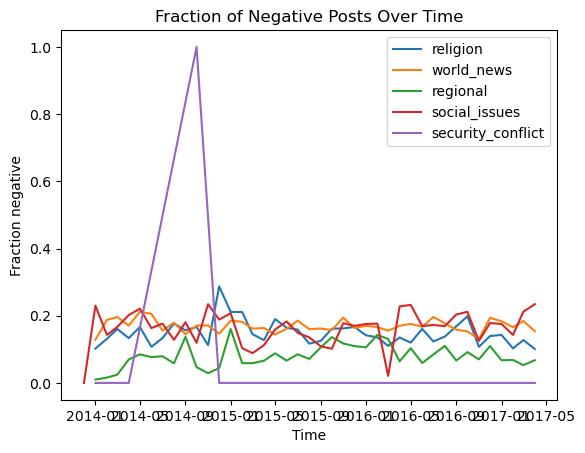

In [85]:
import matplotlib.pyplot as plt

# Ensure timestamp is datetime and add year-month
df_all["TIMESTAMP"] = pd.to_datetime(df_all["TIMESTAMP"])
df_all["year_month"] = df_all["TIMESTAMP"].dt.to_period("M")

categories = {
    "religion": religion,
    "world_news": world_news,
    "regional": regional,
    "social_issues": social_issues,
    "security_conflict": security_conflict
}

trends = {}

for cat, subs in categories.items():
    subset = df_all[
        (df_all["SOURCE_SUBREDDIT"].isin(subs)) |
        (df_all["TARGET_SUBREDDIT"].isin(subs))
    ].copy()

    # Use the expanded column directly
    subset["LIWC_Anger"] = subset["LIWC_Anger"].astype(float)

    grouped = subset.groupby("year_month").agg(
        frac_negative=("LINK_SENTIMENT", lambda x: (x == -1).mean()),
        anger=("LIWC_Anger", "mean"),
        volume=("POST_ID", "count")
    )

    trends[cat] = grouped
    plt.plot(grouped.index.to_timestamp(), grouped["frac_negative"], label=cat)

plt.legend()
plt.title("Fraction of Negative Posts Over Time")
plt.xlabel("Time")
plt.ylabel("Fraction negative")
plt.show()


In [89]:
trends['religion']

,frac_negative,anger,volume
year_month,,,
2014-01,0.102362,0.010261,127
2014-02,0.131313,0.012711,99
2014-03,0.160494,0.016313,81
2014-04,0.133333,0.014589,105
2014-05,0.166667,0.011365,96
2014-06,0.107527,0.014422,93
2014-07,0.133333,0.008243,120
2014-08,0.176923,0.008371,130
2014-09,0.156522,0.014291,115


In [94]:
display(df_all)

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,year_month
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,4.789474,15.0,0.315789,1.0,1.0,345.000000,57.000000,35.577895,0.073,0.080,0.1748,0.344828,0.051724,0.034483,0.000000,0.034483,0.000000,0.000000,0.0,0.017241,0.051724,0.103448,0.051724,0.000000,0.103448,0.000000,0.034483,0.034483,0.068966,0.017241,0.034483,0.000000,0.000,0.103448,0.000000,0.0,0.000000,0.051724,0.017241,0.034483,0.000000,0.000000,0.017241,0.189655,0.034483,0.0,0.034483,0.034483,0.000000,0.000000,0.068966,0.051724,0.034483,0.034483,0.000000,0.0,0.017241,0.017241,0.0,0.0,0.0,0.068966,0.017241,0.051724,0.000000,0.051724,0.068966,0.034483,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2013-12
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,5.714286,1.0,0.071429,2.0,0.0,49.500000,7.000000,16.049286,0.472,0.000,0.5538,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.133333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2013-12
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,7.200000,0.0,0.000000,1.0,0.0,85.000000,10.000000,23.605000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2014-01
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,4.623037,36.0,0.366492,15.0,9.0,73.200000,12.733333,12.654154,0.153,0.026,0.9672,0.526042,0.109375,0.041667,0.031250,0.000000,0.005208,0.010417,0.0,0.067708,0.057292,0.151042,0.098958,0.015625,0.083333,0.036458,0.052083,0.109375,0.052083,0.010417,0.046875,0.005208,0.000,0.067708,0.010417,0.0,0.000000,0.052083,0.041667,0.010417,0.010417,0.000000,0.000

In [96]:
df_all.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'PROPERTIES', 'num_chars', 'num_chars_no_space',
       'frac_alpha', 'frac_digits', 'frac_upper', 'frac_spaces',
       'frac_special', 'num_words', 'num_unique_words', 'num_long_words',
       'avg_word_length', 'num_unique_stopwords', 'frac_stopwords',
       'num_sentences', 'num_long_sentences', 'avg_chars_per_sentence',
       'avg_words_per_sentence', 'readability_index', 'sent_pos', 'sent_neg',
       'sent_compound', 'LIWC_Funct', 'LIWC_Pronoun', 'LIWC_Ppron', 'LIWC_I',
       'LIWC_We', 'LIWC_You', 'LIWC_SheHe', 'LIWC_They', 'LIWC_Ipron',
       'LIWC_Article', 'LIWC_Verbs', 'LIWC_AuxVb', 'LIWC_Past', 'LIWC_Present',
       'LIWC_Future', 'LIWC_Adverbs', 'LIWC_Prep', 'LIWC_Conj', 'LIWC_Negate',
       'LIWC_Quant', 'LIWC_Numbers', 'LIWC_Swear', 'LIWC_Social',
       'LIWC_Family', 'LIWC_Friends', 'LIWC_Humans', 'LIWC_Affect',
       'LIWC_Posemo', 'LIWC_Negemo', 'LIWC_Anx', 'LIWC_A

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. PREPARATION ---

# The correct column name for the timestamp is 'TIMESTAMP'
timestamp_col = 'TIMESTAMP'

# Convert the 'TIMESTAMP' column to a datetime object. This is a critical step
# to ensure the data is properly formatted for date operations and plotting.
df_all[timestamp_col] = pd.to_datetime(df_all[timestamp_col])

# Note: The 'year_month' column already exists in your DataFrame, so we don't
# need to recreate it, but we still ensure the timestamp is a datetime object.

# Define the period and keywords
start_month = '2015-08'
end_month = '2016-02'
paris_attack_month = '2015-11'

# Keywords for identifying relevant subreddits
keywords = ['paris', 'religion', 'islam', 'christianity', 'worldnews', 'news', 'europe', 'politics', 'france']

def is_relevant(subreddit, keywords):
    """Checks if a subreddit contains any of the relevant keywords."""
    if pd.isna(subreddit):
        return False
    return any(k in subreddit.lower() for k in keywords)

# Filter the data for the relevant period
df_filtered = df_all[(df_all['year_month'] >= start_month) & (df_all['year_month'] <= end_month)].copy()

# Filter for posts where either the source or target subreddit is relevant
relevant_filter = df_filtered['SOURCE_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords)) | \
                  df_filtered['TARGET_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords))

df_relevant = df_filtered[relevant_filter].copy()

if df_relevant.empty:
    print("No relevant data found for the specified period and keywords.")
else:
    # --- 2. EVOLVING INTERACTIONS ANALYSIS ---
    # Focus on a core set of subreddits for a clearer plot
    core_keywords = ['paris', 'islam', 'worldnews', 'europe', 'news']
    core_relevant_filter = df_relevant['SOURCE_SUBREDDIT'].apply(lambda x: is_relevant(x, core_keywords)) & \
                           df_relevant['TARGET_SUBREDDIT'].apply(lambda x: is_relevant(x, core_keywords))
    df_core_interactions = df_relevant[core_relevant_filter].copy()

    if not df_core_interactions.empty:
        # Group by year_month and the interaction pair, then count
        interaction_counts = df_core_interactions.groupby(['year_month', 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']).size().reset_index(name='link_count')
        interaction_counts['interaction'] = interaction_counts['SOURCE_SUBREDDIT'] + ' -> ' + interaction_counts['TARGET_SUBREDDIT']

        # Pivot for plotting
        interaction_pivot = interaction_counts.pivot(index='year_month', columns='interaction', values='link_count').fillna(0)

        # Reindex to ensure all months are present for a proper chronological plot
        all_months = pd.date_range(start_month, end_month, freq='MS').strftime('%Y-%m')
        interaction_pivot = interaction_pivot.reindex(all_months, fill_value=0)

        plt.figure(figsize=(14, 7))
        interaction_pivot.plot(kind='line', marker='o', ax=plt.gca())

        # Highlight the month of the attack
        if paris_attack_month in interaction_pivot.index:
            plt.axvline(x=interaction_pivot.index.get_loc(paris_attack_month), color='r', linestyle='--', linewidth=2, label='Paris Attacks (Nov 2015)')

        plt.title('Evolving Interactions Between Key Subreddits (Links Count)', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Number of Links', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Subreddit Interaction', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('subreddit_interactions_paris_attacks.png')
        plt.close()

    # --- 3. NEGATIVE SENTIMENT ANALYSIS ---
    sentiment_data = []

    # Calculate mean negative sentiment for each relevant subreddit (where it is the source)
    for subreddit in df_relevant['SOURCE_SUBREDDIT'].unique():
        if is_relevant(subreddit, keywords):
            df_sub = df_relevant[df_relevant['SOURCE_SUBREDDIT'] == subreddit]
            sentiment_data.append(df_sub.groupby('year_month')['sent_neg'].mean().rename(subreddit + '_source'))

    if sentiment_data:
        sentiment_ts = pd.concat(sentiment_data, axis=1)

        # Reindex to ensure all months are present
        all_months = pd.date_range(start_month, end_month, freq='MS').strftime('%Y-%m')
        sentiment_ts = sentiment_ts.reindex(all_months)

        # Calculate the overall average negative sentiment across all relevant posts
        sentiment_ts['Overall_Relevant_Avg'] = df_relevant.groupby('year_month')['sent_neg'].mean().reindex(all_months)

        plt.figure(figsize=(14, 7))
        sentiment_ts.plot(kind='line', marker='o', ax=plt.gca())

        # Highlight the month of the attack
        if paris_attack_month in sentiment_ts.index:
             plt.axvline(x=sentiment_ts.index.get_loc(paris_attack_month), color='r', linestyle='--', linewidth=2, label='Paris Attacks (Nov 2015)')

        plt.title('Average Negative Sentiment (sent\_neg) in Relevant Subreddit Posts', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Average Negative Sentiment Score', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('negative_sentiment_paris_attacks.png')
        plt.close()

    print("Analysis complete. Two plots have been generated: 'subreddit_interactions_paris_attacks.png' and 'negative_sentiment_paris_attacks.png'.")

<>:105: SyntaxWarning: invalid escape sequence '\_'
<>:105: SyntaxWarning: invalid escape sequence '\_'
C:\Users\julso\AppData\Local\Temp\ipykernel_1020\1427140319.py:105: SyntaxWarning: invalid escape sequence '\_'
  plt.title('Average Negative Sentiment (sent\_neg) in Relevant Subreddit Posts', fontsize=16)
C:\Users\julso\AppData\Local\Temp\ipykernel_1020\1427140319.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\julso\AppData\Local\Temp\ipykernel_1020\1427140319.py:111: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Analysis complete. Two plots have been generated: 'subreddit_interactions_paris_attacks.png' and 'negative_sentiment_paris_attacks.png'.


In [98]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# --- 1. DATA PREPARATION (Assuming 'TIMESTAMP' is converted and 'year_month' exists) ---
timestamp_col = 'TIMESTAMP'
df_all[timestamp_col] = pd.to_datetime(df_all[timestamp_col])

start_month = '2015-08'
end_month = '2016-02'
paris_attack_month = '2015-11'

keywords = ['paris', 'religion', 'islam', 'christianity', 'worldnews', 'news', 'europe', 'politics', 'france']

def is_relevant(subreddit, keywords):
    """Checks if a subreddit contains any of the relevant keywords."""
    if pd.isna(subreddit):
        return False
    return any(k in subreddit.lower() for k in keywords)

# Filter the data for the relevant period
df_filtered = df_all[(df_all['year_month'] >= start_month) & (df_all['year_month'] <= end_month)].copy()

# Filter for posts where either the source or target subreddit is relevant
relevant_filter = df_filtered['SOURCE_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords)) | \
                  df_filtered['TARGET_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords))

df_relevant = df_filtered[relevant_filter].copy()

if df_relevant.empty:
    print("No relevant data found for the specified period and keywords. Cannot proceed with analysis.")
else:
    # --- 2. DEFINE PERIODS ---
    before_months = ['2015-08', '2015-09', '2015-10']
    during_months = ['2015-11']
    after_months = ['2015-12', '2016-01', '2016-02']

    def get_period(year_month):
        if year_month in before_months:
            return 'Before'
        elif year_month in during_months:
            return 'During'
        elif year_month in after_months:
            return 'After'
        return 'Other'

    df_relevant['period'] = df_relevant['year_month'].apply(get_period)


    # --- 3. TABULAR DATA GENERATION ---

    print("--- Analysis Tables ---")

    # A. Link Counts by Period
    # Count the total number of unique links (posts) in each period
    link_counts_table = df_relevant.groupby('period').agg(
        Total_Posts=('POST_ID', 'count'),
        Unique_Source_Subreddits=('SOURCE_SUBREDDIT', 'nunique'),
        Unique_Target_Subreddits=('TARGET_SUBREDDIT', 'nunique')
    ).reindex(['Before', 'During', 'After'])

    print("\nTable 1: Overall Activity (Link Counts) by Period")
    print(link_counts_table)
    
    # B. Negative Sentiment (sent_neg) by Period
    sentiment_table = df_relevant.groupby('period')['sent_neg'].mean().reset_index(name='Avg_Negative_Sentiment')
    sentiment_table = sentiment_table.set_index('period').reindex(['Before', 'During', 'After'])

    print("\nTable 2: Average Negative Sentiment by Period")
    print(sentiment_table)


    # --- 4. STATISTICAL SIGNIFICANCE (Negative Sentiment) ---
    
    print("\n--- Statistical Significance Check (Negative Sentiment) ---")

    # Extract 'sent_neg' data for the three periods
    sent_neg_before = df_relevant[df_relevant['period'] == 'Before']['sent_neg'].dropna().values
    sent_neg_during = df_relevant[df_relevant['period'] == 'During']['sent_neg'].dropna().values
    sent_neg_after = df_relevant[df_relevant['period'] == 'After']['sent_neg'].dropna().values

    # Check for sufficient data
    if len(sent_neg_before) > 1 and len(sent_neg_during) > 1 and len(sent_neg_after) > 1:
        # Kruskal-Wallis H-test (non-parametric test for difference in means/medians)
        H_stat, p_value = stats.kruskal(sent_neg_before, sent_neg_during, sent_neg_after)
        
        print(f"Kruskal-Wallis H-test for Negative Sentiment (Before, During, After):")
        print(f"H-statistic: {H_stat:.4f}")
        print(f"P-value: {p_value:.4e}")
        
        alpha = 0.05
        if p_value < alpha:
            print("Conclusion: The average negative sentiment across the three periods is statistically significantly different.")
            print("This suggests the Paris attacks caused a significant shift in the emotional tone of posts.")
        else:
            print("Conclusion: The difference in average negative sentiment across the three periods is NOT statistically significant.")
            
    else:
        print("Not enough data points to perform the Kruskal-Wallis H-test.")


    # --- 5. TOPIC CHANGE AND OTHER RELEVANT METRICS (LIWC Analysis) ---

    # Selected LIWC categories for analysis
    liwc_cols = [
        'LIWC_Negemo', 'LIWC_Anger', 'LIWC_Anx', 'LIWC_Sad', # Emotional
        'LIWC_Time', 'LIWC_Past', 'LIWC_Future',             # Time perspective
        'LIWC_Relig', 'LIWC_Death', 'LIWC_Social',           # Event relevance
        'LIWC_CogMech', 'LIWC_Insight'                       # Cognitive processes
    ]
    
    # Check if all LIWC columns exist
    missing_liwc = [col for col in liwc_cols if col not in df_all.columns]
    if missing_liwc:
        print(f"\nWarning: The following LIWC columns were not found and skipped: {missing_liwc}")
        liwc_cols = [col for col in liwc_cols if col in df_all.columns]
        
    if liwc_cols:
        # Calculate the mean of LIWC metrics grouped by period
        liwc_analysis = df_relevant.groupby('period')[liwc_cols].mean()
        liwc_analysis = liwc_analysis.reindex(['Before', 'During', 'After']).transpose().applymap(lambda x: f'{x:.4f}')

        print("\nTable 3: Topic/Style Change (Average LIWC Percentage) by Period")
        print(liwc_analysis)
        print("\nInterpretation of Table 3 (LIWC):")
        print("- LIWC categories are percentages of total words. A higher value means more usage.")
        print("- Look for spikes 'During' the event to identify focused topics (e.g., LIWC_Death, LIWC_Relig) and emotional shifts (e.g., LIWC_Anger, LIWC_Anx).")
        print("- Changes in 'LIWC_Time' and 'LIWC_Past'/'LIWC_Future' show shifts in how people discuss events (focus on the moment, past causes, or future consequences).")
    
print("\nAnalysis code complete.")

--- Analysis Tables ---

Table 1: Overall Activity (Link Counts) by Period
        Total_Posts  Unique_Source_Subreddits  Unique_Target_Subreddits
period                                                                 
Before          NaN                       NaN                       NaN
During          NaN                       NaN                       NaN
After           NaN                       NaN                       NaN

Table 2: Average Negative Sentiment by Period
        Avg_Negative_Sentiment
period                        
Before                     NaN
During                     NaN
After                      NaN

--- Statistical Significance Check (Negative Sentiment) ---
Not enough data points to perform the Kruskal-Wallis H-test.

Table 3: Topic/Style Change (Average LIWC Percentage) by Period
period       Before During After
LIWC_Negemo     nan    nan   nan
LIWC_Anger      nan    nan   nan
LIWC_Anx        nan    nan   nan
LIWC_Sad        nan    nan   nan
LIWC_Time  

C:\Users\julso\AppData\Local\Temp\ipykernel_1020\617238245.py:122: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  liwc_analysis = liwc_analysis.reindex(['Before', 'During', 'After']).transpose().applymap(lambda x: f'{x:.4f}')


In [99]:
import pandas as pd

# --- Debugging Snippet ---

# 1. Check Initial Data Size and Content
print(f"Total rows in df_all: {len(df_all)}")
print("\nFirst 5 rows of the 'year_month' column:")
print(df_all['year_month'].head())

# 2. Re-Confirm Filtering Period
start_month = '2015-08'
end_month = '2016-02'
df_filtered = df_all[(df_all['year_month'] >= start_month) & (df_all['year_month'] <= end_month)].copy()
print(f"\nRows after filtering by period ({start_month} to {end_month}): {len(df_filtered)}")

# 3. Check Filtering by Keyword
keywords = ['paris', 'religion', 'islam', 'christianity', 'worldnews', 'news', 'europe', 'politics', 'france']
def is_relevant(subreddit, keywords):
    if pd.isna(subreddit):
        return False
    return any(k in subreddit.lower() for k in keywords)

relevant_filter = df_filtered['SOURCE_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords)) | \
                  df_filtered['TARGET_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords))

df_relevant = df_filtered[relevant_filter].copy()
print(f"Rows in df_relevant after keyword filtering: {len(df_relevant)}")

if not df_relevant.empty:
    # 4. Check Period Assignment
    before_months = ['2015-08', '2015-09', '2015-10']
    during_months = ['2015-11']
    after_months = ['2015-12', '2016-01', '2016-02']

    def get_period(year_month):
        if year_month in before_months:
            return 'Before'
        elif year_month in during_months:
            return 'During'
        elif year_month in after_months:
            return 'After'
        return 'Other'

    df_relevant['period'] = df_relevant['year_month'].apply(get_period)
    
    # Check counts per assigned period
    print("\nCounts by Assigned Period:")
    print(df_relevant['period'].value_counts())
else:
    print("\nError: df_relevant is empty. Check filtering steps.")

# --- End of Debugging Snippet ---

Total rows in df_all: 858488

First 5 rows of the 'year_month' column:
0    2013-12
1    2013-12
2    2014-01
3    2013-12
4    2014-01
Name: year_month, dtype: period[M]

Rows after filtering by period (2015-08 to 2016-02): 162430
Rows in df_relevant after keyword filtering: 10652

Counts by Assigned Period:
period
Other    10652
Name: count, dtype: int64


In [100]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# --- 1. DATA PREPARATION (Fixing the dtype issue) ---
timestamp_col = 'TIMESTAMP'

# Convert the 'TIMESTAMP' column to a datetime object (if not already done)
df_all[timestamp_col] = pd.to_datetime(df_all[timestamp_col])

# *** CRITICAL FIX ***
# Convert the 'year_month' column from Period[M] dtype to string ('YYYY-MM')
# so it can be compared with the list of month strings (e.g., '2015-11').
df_all['year_month'] = df_all['year_month'].astype(str)

# Define the period and keywords
start_month = '2015-08'
end_month = '2016-02'
paris_attack_month = '2015-11'

# Keywords for identifying relevant subreddits
keywords = ['paris', 'religion', 'islam', 'christianity', 'worldnews', 'news', 'europe', 'politics', 'france']

def is_relevant(subreddit, keywords):
    """Checks if a subreddit contains any of the relevant keywords."""
    if pd.isna(subreddit):
        return False
    return any(k in subreddit.lower() for k in keywords)

# Filter the data for the relevant period
# NOTE: The filtering needs to use the string comparison now.
df_filtered = df_all[(df_all['year_month'] >= start_month) & (df_all['year_month'] <= end_month)].copy()

# Filter for posts where either the source or target subreddit is relevant
relevant_filter = df_filtered['SOURCE_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords)) | \
                  df_filtered['TARGET_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords))

df_relevant = df_filtered[relevant_filter].copy()

if df_relevant.empty:
    print("No relevant data found for the specified period and keywords. Cannot proceed with analysis.")
else:
    # --- 2. DEFINE PERIODS ---
    before_months = ['2015-08', '2015-09', '2015-10']
    during_months = ['2015-11']
    after_months = ['2015-12', '2016-01', '2016-02']

    def get_period(year_month):
        # Now 'year_month' is a string, so this check will work correctly.
        if year_month in before_months:
            return 'Before'
        elif year_month in during_months:
            return 'During'
        elif year_month in after_months:
            return 'After'
        return 'Other'

    df_relevant['period'] = df_relevant['year_month'].apply(get_period)

    # Sanity Check: If this runs, the output should now show counts in Before/During/After
    # print(df_relevant['period'].value_counts())


    # --- 3. TABULAR DATA GENERATION ---

    print("--- Analysis Tables ---")

    # A. Link Counts by Period
    link_counts_table = df_relevant.groupby('period').agg(
        Total_Posts=('POST_ID', 'count'),
        Unique_Source_Subreddits=('SOURCE_SUBREDDIT', 'nunique'),
        Unique_Target_Subreddits=('TARGET_SUBREDDIT', 'nunique')
    ).reindex(['Before', 'During', 'After'])

    print("\nTable 1: Overall Activity (Link Counts) by Period")
    print(link_counts_table)

    # B. Negative Sentiment (sent_neg) by Period
    sentiment_table = df_relevant.groupby('period')['sent_neg'].mean().reset_index(name='Avg_Negative_Sentiment')
    sentiment_table = sentiment_table.set_index('period').reindex(['Before', 'During', 'After'])

    print("\nTable 2: Average Negative Sentiment by Period")
    print(sentiment_table)


    # --- 4. STATISTICAL SIGNIFICANCE (Negative Sentiment) ---

    print("\n--- Statistical Significance Check (Negative Sentiment) ---")

    # Extract 'sent_neg' data for the three periods
    sent_neg_before = df_relevant[df_relevant['period'] == 'Before']['sent_neg'].dropna().values
    sent_neg_during = df_relevant[df_relevant['period'] == 'During']['sent_neg'].dropna().values
    sent_neg_after = df_relevant[df_relevant['period'] == 'After']['sent_neg'].dropna().values

    if len(sent_neg_before) > 1 and len(sent_neg_during) > 1 and len(sent_neg_after) > 1:
        # Kruskal-Wallis H-test (non-parametric test for difference in means/medians)
        H_stat, p_value = stats.kruskal(sent_neg_before, sent_neg_during, sent_neg_after)

        print(f"Kruskal-Wallis H-test for Negative Sentiment (Before, During, After):")
        print(f"H-statistic: {H_stat:.4f}")
        print(f"P-value: {p_value:.4e}")

        alpha = 0.05
        if p_value < alpha:
            print("Conclusion: The average negative sentiment across the three periods is statistically significantly different.")
            print("This suggests the Paris attacks caused a significant shift in the emotional tone of posts.")
        else:
            print("Conclusion: The difference in average negative sentiment across the three periods is NOT statistically significant.")

    else:
        print("Not enough data points to perform the Kruskal-Wallis H-test.")


    # --- 5. TOPIC CHANGE AND OTHER RELEVANT METRICS (LIWC Analysis) ---

    liwc_cols = [
        'LIWC_Negemo', 'LIWC_Anger', 'LIWC_Anx', 'LIWC_Sad',
        'LIWC_Time', 'LIWC_Past', 'LIWC_Future',
        'LIWC_Relig', 'LIWC_Death', 'LIWC_Social',
        'LIWC_CogMech', 'LIWC_Insight'
    ]

    missing_liwc = [col for col in liwc_cols if col not in df_all.columns]
    if missing_liwc:
        print(f"\nWarning: The following LIWC columns were not found and skipped: {missing_liwc}")
        liwc_cols = [col for col in liwc_cols if col in df_all.columns]

    if liwc_cols:
        liwc_analysis = df_relevant.groupby('period')[liwc_cols].mean()
        liwc_analysis = liwc_analysis.reindex(['Before', 'During', 'After']).transpose().applymap(lambda x: f'{x:.4f}')

        print("\nTable 3: Topic/Style Change (Average LIWC Percentage) by Period")
        print(liwc_analysis)
        print("\nInterpretation of Table 3 (LIWC):")
        print("- LIWC categories are percentages of total words. A higher value means more usage.")
        print("- Look for spikes 'During' the event to identify focused topics (e.g., LIWC_Death, LIWC_Relig) and emotional shifts (e.g., LIWC_Anger, LIWC_Anx).")

print("\nAnalysis code complete.")

--- Analysis Tables ---

Table 1: Overall Activity (Link Counts) by Period
        Total_Posts  Unique_Source_Subreddits  Unique_Target_Subreddits
period                                                                 
Before         4328                       944                       452
During         1603                       481                       261
After          4721                      1011                       504

Table 2: Average Negative Sentiment by Period
        Avg_Negative_Sentiment
period                        
Before                0.087396
During                0.103100
After                 0.096771

--- Statistical Significance Check (Negative Sentiment) ---
Kruskal-Wallis H-test for Negative Sentiment (Before, During, After):
H-statistic: 26.0229
P-value: 2.2346e-06
Conclusion: The average negative sentiment across the three periods is statistically significantly different.
This suggests the Paris attacks caused a significant shift in the emotional tone 

C:\Users\julso\AppData\Local\Temp\ipykernel_1020\1911316855.py:131: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  liwc_analysis = liwc_analysis.reindex(['Before', 'During', 'After']).transpose().applymap(lambda x: f'{x:.4f}')


In [101]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# --- 1. DATA PREPARATION (Fixing the dtype issue and setting new period) ---
timestamp_col = 'TIMESTAMP'

# Convert the 'TIMESTAMP' column to a datetime object (if not already done)
df_all[timestamp_col] = pd.to_datetime(df_all[timestamp_col], errors='coerce')

# *** CRITICAL FIX ***
# Convert the 'year_month' column to string ('YYYY-MM') for correct comparison
if df_all['year_month'].dtype == 'object' or 'period' in str(df_all['year_month'].dtype):
    df_all['year_month'] = df_all['year_month'].astype(str)

# Define the new period and keywords for Charlie Hebdo
start_month = '2014-10'
end_month = '2015-04'
attack_month = '2015-01'

# Keywords specific to Charlie Hebdo and related topics
keywords = ['charlie hebdo', 'cartoon', 'satire', 'paris', 'islam', 'france', 'freedom', 'speech', 'religion', 'worldnews']

def is_relevant(subreddit, keywords):
    """Checks if a subreddit contains any of the relevant keywords."""
    if pd.isna(subreddit):
        return False
    return any(k in subreddit.lower() for k in keywords)

# Filter the data for the relevant period
df_filtered = df_all[(df_all['year_month'] >= start_month) & (df_all['year_month'] <= end_month)].copy()

# Filter for posts where either the source or target subreddit is relevant
relevant_filter = df_filtered['SOURCE_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords)) | \
                  df_filtered['TARGET_SUBREDDIT'].apply(lambda x: is_relevant(x, keywords))

df_relevant = df_filtered[relevant_filter].copy()

if df_relevant.empty:
    print("No relevant data found for the Charlie Hebdo period and keywords. Cannot proceed with analysis.")
else:
    # --- 2. DEFINE PERIODS ---
    before_months = ['2014-10', '2014-11', '2014-12']
    during_months = [attack_month]
    after_months = ['2015-02', '2015-03', '2015-04']

    def get_period(year_month):
        if year_month in before_months:
            return 'Before'
        elif year_month in during_months:
            return 'During'
        elif year_month in after_months:
            return 'After'
        return 'Other'

    df_relevant['period'] = df_relevant['year_month'].apply(get_period)
    df_relevant = df_relevant[df_relevant['period'] != 'Other'].copy() # Keep only the three periods


    # --- 3. TABULAR DATA GENERATION ---

    print("\n--- Charlie Hebdo Analysis Tables (Jan 2015) ---")

    # A. Link Counts by Period
    link_counts_table = df_relevant.groupby('period').agg(
        Total_Posts=('POST_ID', 'count'),
        Unique_Source_Subreddits=('SOURCE_SUBREDDIT', 'nunique'),
        Unique_Target_Subreddits=('TARGET_SUBREDDIT', 'nunique')
    ).reindex(['Before', 'During', 'After'])

    print("\nTable 1: Overall Activity (Link Counts) by Period")
    print(link_counts_table)

    # B. Negative Sentiment (sent_neg) by Period
    sentiment_table = df_relevant.groupby('period')['sent_neg'].mean().reset_index(name='Avg_Negative_Sentiment')
    sentiment_table = sentiment_table.set_index('period').reindex(['Before', 'During', 'After'])

    print("\nTable 2: Average Negative Sentiment by Period")
    print(sentiment_table)


    # --- 4. STATISTICAL SIGNIFICANCE (Negative Sentiment) ---

    print("\n--- Statistical Significance Check (Negative Sentiment) ---")

    sent_neg_before = df_relevant[df_relevant['period'] == 'Before']['sent_neg'].dropna().values
    sent_neg_during = df_relevant[df_relevant['period'] == 'During']['sent_neg'].dropna().values
    sent_neg_after = df_relevant[df_relevant['period'] == 'After']['sent_neg'].dropna().values

    if len(sent_neg_before) > 1 and len(sent_neg_during) > 1 and len(sent_neg_after) > 1:
        # Kruskal-Wallis H-test
        H_stat, p_value = stats.kruskal(sent_neg_before, sent_neg_during, sent_neg_after)

        print(f"Kruskal-Wallis H-test for Negative Sentiment (Before, During, After):")
        print(f"H-statistic: {H_stat:.4f}")
        print(f"P-value: {p_value:.4e}")

        alpha = 0.05
        if p_value < alpha:
            print("Conclusion: The average negative sentiment across the three periods is statistically significantly different.")
        else:
            print("Conclusion: The difference in average negative sentiment across the three periods is NOT statistically significant.")

    else:
        print("Not enough data points to perform the Kruskal-Wallis H-test.")


    # --- 5. TOPIC CHANGE AND OTHER RELEVANT METRICS (LIWC Analysis) ---

    liwc_cols = [
        'LIWC_Negemo', 'LIWC_Anger', 'LIWC_Anx', 'LIWC_Sad',
        'LIWC_Time', 'LIWC_Past', 'LIWC_Future',
        'LIWC_Relig', 'LIWC_Death', 'LIWC_Social',
        'LIWC_CogMech', 'LIWC_Insight'
    ]

    missing_liwc = [col for col in liwc_cols if col not in df_all.columns]
    if missing_liwc:
        liwc_cols = [col for col in liwc_cols if col in df_all.columns]

    if liwc_cols:
        liwc_analysis = df_relevant.groupby('period')[liwc_cols].mean()
        liwc_analysis = liwc_analysis.reindex(['Before', 'During', 'After']).transpose().applymap(lambda x: f'{x:.4f}')

        print("\nTable 3: Topic/Style Change (Average LIWC Percentage) by Period")
        print(liwc_analysis)

print("\nCharlie Hebdo analysis code complete. Please run this to compare trends.")


--- Charlie Hebdo Analysis Tables (Jan 2015) ---

Table 1: Overall Activity (Link Counts) by Period
        Total_Posts  Unique_Source_Subreddits  Unique_Target_Subreddits
period                                                                 
Before          921                       344                        97
During          412                       187                        58
After          1020                       369                       114

Table 2: Average Negative Sentiment by Period
        Avg_Negative_Sentiment
period                        
Before                0.095649
During                0.094337
After                 0.094690

--- Statistical Significance Check (Negative Sentiment) ---
Kruskal-Wallis H-test for Negative Sentiment (Before, During, After):
H-statistic: 0.0600
P-value: 9.7046e-01
Conclusion: The difference in average negative sentiment across the three periods is NOT statistically significant.

Table 3: Topic/Style Change (Average LIWC Percent

C:\Users\julso\AppData\Local\Temp\ipykernel_1020\2824027001.py:124: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  liwc_analysis = liwc_analysis.reindex(['Before', 'During', 'After']).transpose().applymap(lambda x: f'{x:.4f}')


In [1]:
# Quick feasibility check for Idea 1 (Python 3)
# pip install pandas networkx rapidfuzz

import pandas as pd
import networkx as nx
from rapidfuzz import process, fuzz

# --------- 1) Load ----------
# Change path if needed
body = pd.read_csv("data/soc-redditHyperlinks-body.tsv", sep="\t")
title = pd.read_csv("data/soc-redditHyperlinks-title.tsv", sep="\t")
df = pd.concat([body, title], ignore_index=True)

# Keep core cols; drop obvious bots if you like later
df = df[["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "LINK_SENTIMENT", "POST_ID", "TIMESTAMP"]].dropna()

# --------- 2) Detect country/region subreddits ----------
# Seed list of country names (extend as needed)
countries = [
    "Norway","Sweden","Denmark","Finland","Iceland","France","Germany","Poland","Italy","Spain",
    "Portugal","Netherlands","Belgium","Switzerland","Austria","UK","UnitedKingdom","Ireland",
    "USA","UnitedStates","Canada","Mexico","Brazil","Argentina","Chile","Peru",
    "Russia","Ukraine","Belarus","Turkey","Greece","Romania","Bulgaria","Serbia","Croatia","Hungary",
    "India","Pakistan","Bangladesh","SriLanka","China","Japan","Korea","SouthKorea","Taiwan",
    "Australia","NewZealand","SouthAfrica","Egypt","Israel","Iran","Iraq","SaudiArabia","UAE"
]

# Common subreddit naming: r/<country>, r/<country>Politics, r/<country>News, r/<country>Soccer, etc.
# We'll keep subs where name contains a country string as a distinct token/prefix/suffix.
def is_country_sub(name):
    n = name.lower()
    # quick accept for canonical forms
    if n in {c.lower() for c in countries}:
        return True
    # allow prefix/suffix forms like france, francepics, france2 is noisy;
    # use fuzzy token matching with a conservative threshold
    match, score, _ = process.extractOne(
        n, [c.lower() for c in countries], scorer=fuzz.partial_ratio
    )
    return score >= 90  # bump up to be stricter; tweak if too few/too many

# Apply to both ends
src_is_country = df["SOURCE_SUBREDDIT"].apply(is_country_sub)
tgt_is_country = df["TARGET_SUBREDDIT"].apply(is_country_sub)
cdf = df[src_is_country & tgt_is_country].copy()

# Optional: normalize a few aliases (e.g., UnitedKingdom -> uk)
alias = {
    "UnitedKingdom": "uk",
    "UK": "uk",
    "UnitedStates": "usa",
    "USA": "usa",
    "SouthKorea": "korea",
}
def normalize(name):
    key = name
    if key in alias: return alias[key]
    return name.lower()

cdf["SOURCE_NORM"] = cdf["SOURCE_SUBREDDIT"].map(normalize)
cdf["TARGET_NORM"] = cdf["TARGET_SUBREDDIT"].map(normalize)

# --------- 3) Build weighted directed graph ----------
# Weight = count of cross-links; sentiment breakdown available if needed
agg = (
    cdf.groupby(["SOURCE_NORM", "TARGET_NORM"])
       .size()
       .reset_index(name="weight")
)

G = nx.DiGraph()
for _, r in agg.iterrows():
    if r["SOURCE_NORM"] != r["TARGET_NORM"]:
        G.add_edge(r["SOURCE_NORM"], r["TARGET_NORM"], weight=int(r["weight"]))

# --------- 4) Quick sanity stats ----------
print(f"# country-country edges: {G.number_of_edges()}")
print(f"# country nodes: {G.number_of_nodes()}")
if G.number_of_nodes():
    largest_cc = max(nx.weakly_connected_components(G), key=len)
    print(f"largest weakly-connected component size: {len(largest_cc)}")

print("\nTop 15 cross-link pairs by weight:")
print(agg.sort_values("weight", ascending=False).head(15))

# Optional: sentiment share per source country
sent = (
    cdf.assign(sent_bin=cdf["LINK_SENTIMENT"].fillna("neutral"))
       .groupby(["SOURCE_NORM", "sent_bin"])
       .size()
       .groupby(level=0)
       .apply(lambda s: (s / s.sum()).round(3))
       .unstack(fill_value=0.0)
       .sort_values(by="negative", ascending=False)
)
print("\nSources ranked by negative share (head):")
print(sent.head(10))

# --------- 5) Save edgelist for Gephi ----------
agg.to_csv("country_country_edgelist.csv", index=False)  # source,target,weight

# Optional: 2D layout positions you can plot quickly
# pos = nx.spring_layout(G, weight="weight", k=0.6, seed=7)
# (plotting skipped to keep this minimal)


# country-country edges: 1794
# country nodes: 730
largest weakly-connected component size: 646

Top 15 cross-link pairs by weight:
               SOURCE_NORM     TARGET_NORM  weight
1092            metacanada  canadapolitics     225
961        japancirclejerk           japan     224
1454  shitcrusaderkingssay   crusaderkings     189
323    circlejerkaustralia       australia     175
120          badukpolitics      ukpolitics     164
35     argentinacirclejerk       argentina     164
974        japancirclejerk       japanlife     162
980        japancirclejerk   learnjapanese     147
978        japancirclejerk     japantravel     137
121          badukpolitics   unitedkingdom     105
1086         merdeinfrance          france     104
703              indianews           india      97
1463     shitrportugalsays        portugal      85
512            francelibre          france      82
1117        metametacanada      metacanada      80


KeyError: 'negative'

In [2]:
import pandas as pd
import networkx as nx
import re

# ---------- 1) Load minimal columns, avoid heavy dropna ----------
usecols = ["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "LINK_SENTIMENT", "POST_ID", "TIMESTAMP"]
dtypes  = {"SOURCE_SUBREDDIT":"string", "TARGET_SUBREDDIT":"string", "POST_ID":"string"}
body  = pd.read_csv("data/soc-redditHyperlinks-body.tsv",  sep="\t", usecols=usecols, dtype=dtypes)
title = pd.read_csv("data/soc-redditHyperlinks-title.tsv", sep="\t", usecols=usecols, dtype=dtypes)
df = pd.concat([body, title], ignore_index=True)

# Keep rows with valid endpoints only
df = df.dropna(subset=["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"]).copy()

# ---------- 2) Country/region detection via regex (fast, stricter) ----------
countries = [
    "norway","sweden","denmark","finland","iceland","france","germany","poland","italy","spain",
    "portugal","netherlands","belgium","switzerland","austria","unitedkingdom","uk","ireland",
    "usa","unitedstates","canada","mexico","brazil","argentina","chile","peru",
    "russia","ukraine","belarus","turkey","greece","romania","bulgaria","serbia","croatia","hungary",
    "india","pakistan","bangladesh","srilanka","china","japan","korea","southkorea","taiwan",
    "australia","newzealand","southafrica","egypt","israel","iran","iraq","saudiarabia","uae",
]
# token = country at start or separated by '_' and then end or non-letters
country_pat = re.compile(r"^(?:{})($|[^a-z])|_(?:{})($|[^a-z])".format("|".join(countries), "|".join(countries)))

def is_country_sub(name: str) -> bool:
    n = str(name).lower()
    return bool(country_pat.search(n)) or (n in countries)

alias = {
    "unitedkingdom":"uk",
    "unitedstates":"usa",
    "southkorea":"korea",
}
def normalize(name: str) -> str:
    n = str(name).lower()
    return alias.get(n, n)

src_is_country = df["SOURCE_SUBREDDIT"].map(is_country_sub)
tgt_is_country = df["TARGET_SUBREDDIT"].map(is_country_sub)
cdf = df[src_is_country & tgt_is_country].copy()

cdf["SOURCE_NORM"] = cdf["SOURCE_SUBREDDIT"].map(normalize)
cdf["TARGET_NORM"] = cdf["TARGET_SUBREDDIT"].map(normalize)

# ---------- 3) Build weighted directed graph ----------
agg = (
    cdf.groupby(["SOURCE_NORM", "TARGET_NORM"], as_index=False)
       .size().rename(columns={"size":"weight"})
)
agg = agg[agg["SOURCE_NORM"] != agg["TARGET_NORM"]]

G = nx.DiGraph()
G.add_weighted_edges_from(agg[["SOURCE_NORM","TARGET_NORM","weight"]].itertuples(index=False, name=None))

# ---------- 4) Quick sanity stats ----------
print(f"# country nodes: {G.number_of_nodes()}")
print(f"# country-country edges: {G.number_of_edges()}")
if G.number_of_nodes():
    wcc = max(nx.weakly_connected_components(G), key=len)
    print(f"largest weakly-connected component size: {len(wcc)}")

print("\nTop 15 cross-link pairs by weight:")
print(agg.sort_values("weight", ascending=False).head(15))

# ---------- 4b) Sentiment preview (map ints to labels safely) ----------
sent_map = {-1:"negative", 0:"neutral", 1:"positive"}
cdf["sent_bin"] = cdf["LINK_SENTIMENT"].map(sent_map).fillna("neutral")

sent = (
    cdf.groupby(["SOURCE_NORM","sent_bin"]).size()
       .groupby(level=0).apply(lambda s: (s/s.sum()).round(3))
       .unstack(fill_value=0.0)
       .sort_values(by="negative", ascending=False)
)
print("\nSources ranked by negative share (head):")
print(sent.head(10))

# ---------- 5) Save for Gephi ----------
agg.to_csv("country_country_edgelist.csv", index=False)  # source,target,weight

# Optional: node stats for labeling in Gephi
pd.DataFrame({
    "node": list(G.nodes()),
    "out_degree": [G.out_degree(n, weight="weight") for n in G.nodes()],
    "in_degree":  [G.in_degree(n,  weight="weight") for n in G.nodes()],
}).to_csv("country_nodes_stats.csv", index=False)


# country nodes: 69
# country-country edges: 441
largest weakly-connected component size: 67

Top 15 cross-link pairs by weight:
    SOURCE_NORM  TARGET_NORM  weight
333  romania_ss      romania      68
258    italy_ss        italy      57
298    pakistan        india      29
177       india     pakistan      23
282  newzealand    australia      18
353      serbia      croatia      14
125      france      belgium      13
91      croatia       serbia      12
114     denmark       sweden      12
139      france  switzerland      12
141      france           uk      10
193        iran       israel      10
381      sweden      denmark       9
423          uk      ireland       8
403      taiwan        china       7

Sources ranked by negative share (head):
sent_bin                 negative  positive
SOURCE_NORM SOURCE_NORM                    
germany     germany         0.167     0.833
uk          uk              0.156     0.844
ukraine     ukraine         0.111     0.889
newzealand  newze

In [2]:
import re
import pandas as pd
import networkx as nx


# --------- 1) Load ----------
# Change path if needed
body = pd.read_csv("data/soc-redditHyperlinks-body.tsv", sep="\t")
title = pd.read_csv("data/soc-redditHyperlinks-title.tsv", sep="\t")
df = pd.concat([body, title], ignore_index=True)

# Keep core cols; drop obvious bots if you like later
df = df[["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "LINK_SENTIMENT", "POST_ID", "TIMESTAMP"]].dropna()


# ---------- Canonical country alias table (extend as needed) ----------
# Keys are subreddit base names (lowercase, suffixes removed), values are canonical country slugs.
country_alias = {
    # English names
    "norway":"norway","norge":"norway",
    "sweden":"sweden","sverige":"sweden",
    "denmark":"denmark","danmark":"denmark",
    "finland":"finland","suomi":"finland",
    "iceland":"iceland","island":"iceland",
    "france":"france","frankrike":"france",
    "germany":"germany","deutschland":"germany",
    "poland":"poland","polska":"poland",
    "italy":"italy","italia":"italy",
    "spain":"spain","espana":"spain","españa":"spain",
    "portugal":"portugal",
    "netherlands":"netherlands","holland":"netherlands","nederland":"netherlands",
    "belgium":"belgium","belgie":"belgium","belgië":"belgium","belgica":"belgium",
    "switzerland":"switzerland","schweiz":"switzerland","suisse":"switzerland","svizzera":"switzerland",
    "austria":"austria","osterreich":"austria","österreich":"austria",
    "uk":"uk","unitedkingdom":"uk","greatbritain":"uk","britain":"uk",
    "ireland":"ireland","eire":"ireland","éire":"ireland",
    "usa":"usa","unitedstates":"usa","america":"usa",
    "canada":"canada",
    "mexico":"mexico","mexico_city":"mexico",  # keep just "mexico" as country
    "brazil":"brazil","brasil":"brazil",
    "argentina":"argentina",
    "chile":"chile",
    "peru":"peru",
    "russia":"russia","rossiya":"russia",
    "ukraine":"ukraine",
    "belarus":"belarus","belarusy":"belarus",
    "turkey":"turkey","turkiye":"turkey","türkiye":"turkey",
    "greece":"greece","ellada":"greece","ελλαδα":"greece",
    "romania":"romania","românia":"romania","romania_ss":"romania",
    "bulgaria":"bulgaria",
    "serbia":"serbia","srbija":"serbia",
    "croatia":"croatia","hrvatska":"croatia",
    "hungary":"hungary","magyarorszag":"hungary","magyarország":"hungary",
    "india":"india","bharat":"india","hindu":"india",  # keep country to "india"
    "pakistan":"pakistan",
    "bangladesh":"bangladesh",
    "srilanka":"srilanka","sri_lanka":"srilanka","sri-lanka":"srilanka","lka":"srilanka",
    "china":"china","zhongguo":"china","zhonghua":"china",
    "japan":"japan","nihon":"japan","nippon":"japan",
    "korea":"korea","southkorea":"korea","republicofkorea":"korea",
    "taiwan":"taiwan",
    "australia":"australia",
    "newzealand":"newzealand","nz":"newzealand","aotearoa":"newzealand",
    "southafrica":"southafrica","rsa":"southafrica",
    "egypt":"egypt",
    "israel":"israel",
    "iran":"iran",
    "iraq":"iraq",
    "saudiarabia":"saudiarabia","ksa":"saudiarabia",
    "uae":"uae","unitedarabemirates":"uae",
}

# suffixes we want to strip from subreddit base names (country_ss, country_news, etc.)
suffix_pat = re.compile(r"(_|[-])?(ss|news|politics|soccer|football|pics|travel|study|jobs|gaming|2|city|life)$")

def base_country_token(sub_name: str) -> str:
    """Lowercase, remove r/, strip common suffixes and non-letters; return base token."""
    n = (sub_name or "").strip().lower()
    n = n.removeprefix("r/")  # in case full names were passed
    n = re.sub(r"[^a-z_äöüßáàâãçéèêíìîóòôõúùûñ\-]", "", n)
    # strip trailing known suffixes iteratively
    base = n
    while True:
        new = suffix_pat.sub("", base)
        if new == base:
            break
        base = new
    # collapse separators
    base = base.replace("-", "").replace("_", "")
    return base

def to_canonical_country(sub_name: str) -> str | None:
    base = base_country_token(sub_name)
    return country_alias.get(base)  # None if we don't recognize it as a country subreddit

# Keep only rows where both ends are mapped to a canonical country
df["SRC_COUNTRY"] = df["SOURCE_SUBREDDIT"].map(to_canonical_country)
df["TGT_COUNTRY"] = df["TARGET_SUBREDDIT"].map(to_canonical_country)
cdf = df.dropna(subset=["SRC_COUNTRY", "TGT_COUNTRY"]).copy()

# Remove same-country edges (we want country-to-country)
cdf = cdf[cdf["SRC_COUNTRY"] != cdf["TGT_COUNTRY"]].copy()

# Aggregate weights
agg = (
    cdf.groupby(["SRC_COUNTRY", "TGT_COUNTRY"], as_index=False)
       .size().rename(columns={"size":"weight"})
       .sort_values("weight", ascending=False)
)

# Build graph
G = nx.DiGraph()
G.add_weighted_edges_from(agg[["SRC_COUNTRY","TGT_COUNTRY","weight"]].itertuples(index=False, name=None))

print(f"# country nodes: {G.number_of_nodes()}")
print(f"# inter-country edges: {G.number_of_edges()}")
if G.number_of_nodes():
    wcc = max(nx.weakly_connected_components(G), key=len)
    print(f"largest weakly-connected component size: {len(wcc)}")

print("\nTop 20 inter-country pairs by weight:")
print(agg.head(20))

# Sentiment preview after canonicalization
sent_map = {-1:"negative", 0:"neutral", 1:"positive"}
cdf["sent_bin"] = cdf["LINK_SENTIMENT"].map(sent_map).fillna("neutral")
sent = (
    cdf.groupby(["SRC_COUNTRY","sent_bin"]).size()
       .groupby(level=0).apply(lambda s: (s/s.sum()).round(3))
       .unstack(fill_value=0.0)
       .sort_values(by="negative", ascending=False)
)
print("\nCountries ranked by negative share (sources):")
print(sent.head(15))

# Save for Gephi
agg.to_csv("country_intercountry_edgelist.csv", index=False)
sent.reset_index().to_csv("country_source_sentiment.csv", index=False)


# country nodes: 50
# inter-country edges: 457
largest weakly-connected component size: 50

Top 20 inter-country pairs by weight:
    SRC_COUNTRY  TGT_COUNTRY  weight
194       india     pakistan      34
316    pakistan        india      29
57       brazil     portugal      20
297  newzealand    australia      18
375      serbia      croatia      14
141      france      belgium      13
157      france  switzerland      13
100     croatia       serbia      12
126     denmark       sweden      12
337    portugal       brazil      11
159      france           uk      10
211        iran       israel      10
401      sweden      denmark       9
138     finland       sweden       8
261       italy       france       8
446          uk      ireland       8
312      norway       sweden       8
46       brazil    argentina       8
201       india           uk       7
424      taiwan        china       7

Countries ranked by negative share (sources):
sent_bin                 negative  positive
SR

ValueError: cannot insert SRC_COUNTRY, already exists

In [1]:
df

NameError: name 'df' is not defined